In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Step 2: Load the dataset

In [55]:
data = pd.read_csv('Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv')
data.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


#### Step 3: Data Cleaning, Data Wrangling, Data preprocessing

In [56]:
data.shape

(53392, 33)

In [57]:
data.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

In [58]:
col_to_use =['YearStart','LocationDesc','Class','Data_Value','Age(years)', 'Education', 'Gender', 'Income','Race/Ethnicity','Low_Confidence_Limit', 'High_Confidence_Limit ']
data = data[col_to_use]
data.head()

,YearStart,LocationDesc,Class,Data_Value,Age(years),Education,Gender,Income,Race/Ethnicity,Low_Confidence_Limit,High_Confidence_Limit
0,2011,Alabama,Obesity / Weight Status,32.0,NaN,NaN,NaN,NaN,NaN,30.5,33.5
1,2011,Alabama,Obesity / Weight Status,32.3,NaN,NaN,Male,NaN,NaN,29.9,34.7
2,2011,Alabama,Obesity / Weight Status,31.8,NaN,NaN,Female,NaN,NaN,30.0,33.6
3,2011,Alabama,Obesity / Weight Status,33.6,NaN,Less than high school,NaN,NaN,NaN,29.9,37.6
4,2011,Alabama,Obesity / Weight Status,32.8,NaN,High school graduate,NaN,NaN,NaN,30.2,35.6


In [59]:
data.shape

(53392, 11)

In [60]:
data.isnull().sum()

YearStart                     0
LocationDesc                  0
Class                         0
Data_Value                 5046
Age(years)                41954
Education                 45764
Gender                    49578
Income                    40043
Race/Ethnicity            38136
Low_Confidence_Limit       5046
High_Confidence_Limit      5046
dtype: int64

In [61]:
data.isnull().sum()/len(data)*100

YearStart                  0.000000
LocationDesc               0.000000
Class                      0.000000
Data_Value                 9.450854
Age(years)                78.577315
Education                 85.713215
Gender                    92.856608
Income                    74.998127
Race/Ethnicity            71.426431
Low_Confidence_Limit       9.450854
High_Confidence_Limit      9.450854
dtype: float64

- drop the column which have more than 30% missing value

In [62]:
data = data.drop(['Age(years)','Education','Gender','Income','Race/Ethnicity'], axis=1)
data.head()

,YearStart,LocationDesc,Class,Data_Value,Low_Confidence_Limit,High_Confidence_Limit
0,2011,Alabama,Obesity / Weight Status,32.0,30.5,33.5
1,2011,Alabama,Obesity / Weight Status,32.3,29.9,34.7
2,2011,Alabama,Obesity / Weight Status,31.8,30.0,33.6
3,2011,Alabama,Obesity / Weight Status,33.6,29.9,37.6
4,2011,Alabama,Obesity / Weight Status,32.8,30.2,35.6


In [63]:
data.isnull().sum()

YearStart                    0
LocationDesc                 0
Class                        0
Data_Value                5046
Low_Confidence_Limit      5046
High_Confidence_Limit     5046
dtype: int64

In [64]:
# remove extra space from column name

dic1 = {'High_Confidence_Limit ':'High_Confidence_Limit'}
data = data.rename(columns=(dic1))

In [65]:
data.columns

Index(['YearStart', 'LocationDesc', 'Class', 'Data_Value',
       'Low_Confidence_Limit', 'High_Confidence_Limit'],
      dtype='object')

In [66]:
data['Data_Value'] = data['Data_Value'].fillna(data['Data_Value'].mean())
data['Low_Confidence_Limit'] = data['Low_Confidence_Limit'].fillna(data['Low_Confidence_Limit'].mean())
data['High_Confidence_Limit'] = data['High_Confidence_Limit'].fillna(data['High_Confidence_Limit'].mean())

In [33]:
data.isnull().sum()

YearStart                0
LocationDesc             0
Class                    0
Data_Value               0
Low_Confidence_Limit     0
High_Confidence_Limit    0
dtype: int64

- check relation

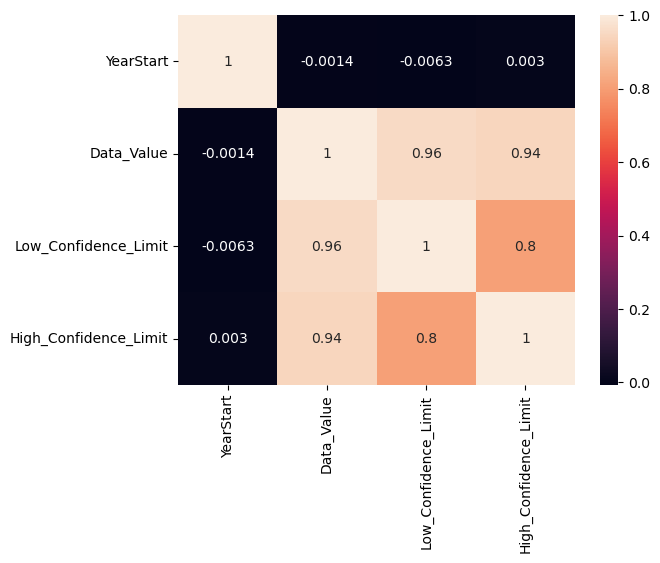

In [67]:
sns.heatmap(data.corr(), annot=True)
plt.show()

In [ ]:
# Apply feature scalling on numerical data

In [68]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc

StandardScaler()

In [69]:
data[['Data_Value','Low_Confidence_Limit','High_Confidence_Limit']] = sc.fit_transform(data[['Data_Value','Low_Confidence_Limit','High_Confidence_Limit']])
data.head()

,YearStart,LocationDesc,Class,Data_Value,Low_Confidence_Limit,High_Confidence_Limit
0,2011,Alabama,Obesity / Weight Status,0.086488,0.377684,-0.233517
1,2011,Alabama,Obesity / Weight Status,0.117255,0.314873,-0.120978
2,2011,Alabama,Obesity / Weight Status,0.065977,0.325341,-0.224138
3,2011,Alabama,Obesity / Weight Status,0.250579,0.314873,0.150989
4,2011,Alabama,Obesity / Weight Status,0.168533,0.346279,-0.036575


In [ ]:
# Apply one-hot encoding on text column

In [70]:
data_ohe = pd.get_dummies(data[['LocationDesc','Class']])
data_ohe

,LocationDesc_Alabama,LocationDesc_Alaska,LocationDesc_Arizona,LocationDesc_Arkansas,LocationDesc_California,LocationDesc_Colorado,LocationDesc_Connecticut,LocationDesc_Delaware,LocationDesc_District of Columbia,LocationDesc_Florida,...,LocationDesc_Vermont,LocationDesc_Virgin Islands,LocationDesc_Virginia,LocationDesc_Washington,LocationDesc_West Virginia,LocationDesc_Wisconsin,LocationDesc_Wyoming,Class_Fruits and Vegetables,Class_Obesity / Weight Status,Class_Physical Activity
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53387,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
53388,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
53389,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
53390,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [39]:
data = pd.concat([data,data_ohe],axis=1)
data.head()

,YearStart,LocationDesc,Class,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,LocationDesc_Alabama,LocationDesc_Alaska,LocationDesc_Arizona,LocationDesc_Arkansas,...,LocationDesc_Vermont,LocationDesc_Virgin Islands,LocationDesc_Virginia,LocationDesc_Washington,LocationDesc_West Virginia,LocationDesc_Wisconsin,LocationDesc_Wyoming,Class_Fruits and Vegetables,Class_Obesity / Weight Status,Class_Physical Activity
0,2011,Alabama,Obesity / Weight Status,0.086488,0.377684,-0.233517,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2011,Alabama,Obesity / Weight Status,0.117255,0.314873,-0.120978,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2011,Alabama,Obesity / Weight Status,0.065977,0.325341,-0.224138,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2011,Alabama,Obesity / Weight Status,0.250579,0.314873,0.150989,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2011,Alabama,Obesity / Weight Status,0.168533,0.346279,-0.036575,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [71]:
data = data.drop(['LocationDesc','Class'], axis=1)
data.head()

,YearStart,Data_Value,Low_Confidence_Limit,High_Confidence_Limit
0,2011,0.086488,0.377684,-0.233517
1,2011,0.117255,0.314873,-0.120978
2,2011,0.065977,0.325341,-0.224138
3,2011,0.250579,0.314873,0.150989
4,2011,0.168533,0.346279,-0.036575


### Step 4: Separate X and y

In [72]:
x = data.drop('Data_Value', axis=1)
y= data['Data_Value']

### Step 5: Split data into train and test set

In [73]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

### Step 6: Apply LR algorithms

In [74]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression()

In [75]:
lr.fit(x_train, y_train)

LinearRegression()

### Step 7: Prediction

In [76]:
y_pred = lr.predict(x_test)
y_pred

array([-1.37000226e+00,  5.10868266e-01, -1.28072412e+00, ...,
       -8.96238609e-04, -4.76454486e-01,  7.88533106e-01])

### Step 8: Evaluation

In [77]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_pred,y_test)
accuracy

0.9987272227970475

- 99% accuracy 

In [78]:
lr.score(x_test, y_test)

0.9987284835296386

In [79]:
lr.score(x_train, y_train)

0.9987866536836626

In [ ]:
- LR euqtion : y = mx + c

In [80]:
m = lr.coef_
m

array([4.04518338e-04, 5.64073500e-01, 4.87707344e-01])

In [81]:
c = lr.intercept_
c

-0.8143826164045944